In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()
os.listdir()


['25043-RE-EXAM_EXAM_FORM.pdf',
 '27302_Application_Form (1).pdf',
 '27302_Application_Form (2).pdf',
 '27302_Application_Form.pdf',
 'ADMISSION_DESKUG (1).mov',
 'ADMISSION_DESKUG (2).mov',
 'ADMISSION_DESKUG.mov',
 'Anaconda3-2025.06-0-Windows-x86_64.exe',
 'AnyDesk (1).exe',
 'AnyDesk (2).exe',
 'AnyDesk (3).exe',
 'AnyDesk.exe',
 'app.py',
 'array_AND_AUG2025_DSAI_1_20th_sep_2025.ipynb',
 'ARZAAN PANTHAKY (1).pdf',
 'avg_secure_browser_setup.exe',
 'Bar_Graph_Movie_Success_Prediction.pptx',
 'bill_survey (1) - bill_survey (1).csv',
 'bill_survey - bill_survey.csv',
 'cancer_data (1).xlsx',
 'Capstone PPT Template.pptx',
 'Capstone project.ipynb',
 'Churn_Modelling.csv',
 'Conclusion_Movie_Success_Creative_Boxes.pptx',
 'Conclusion_Movie_Success_Prediction.pptx',
 'Correlation_Matrix_Insights_Slide.pptx',
 'Data (1).csv',
 'Data - Data (1).csv',
 'Data - Data.csv',
 'Data.csv',
 'Data_Cleaning_Process_Slide.pptx',
 'Data_Split_Strategy_Slide.pptx',
 'Decision_Tree_Confusion_Matrix_W

In [3]:


df = pd.read_csv(r"C:\Users\adani\Downloads\movie_metadata.csv")

print("Dataset Shape:", df.shape)
df.head()



Dataset Shape: (5043, 28)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [5]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
df.shape

(5043, 28)

In [7]:
#columns we not needed
#movie_facebook_likes
# actor_facebook_likes
# director_facebook_likes
# num_user_for_reviews
# num_critic_for_reviews
# num_voted_users

In [8]:
important_features = [
    'duration',
    'genres',
    'director_name',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name',
    'content_rating',
    'budget',
    'title_year',
    'aspect_ratio'
]

In [9]:
df_model = df[important_features + ['imdb_score']].copy()

In [10]:
df_model.head()

,duration,genres,director_name,actor_1_name,actor_2_name,actor_3_name,content_rating,budget,title_year,aspect_ratio,imdb_score
0,178.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,PG-13,237000000.0,2009.0,1.78,7.9
1,169.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,PG-13,300000000.0,2007.0,2.35,7.1
2,148.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,PG-13,245000000.0,2015.0,2.35,6.8
3,164.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,PG-13,250000000.0,2012.0,2.35,8.5
4,NaN,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,NaN,7.1


In [11]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   duration        5028 non-null   float64
 1   genres          5043 non-null   object 
 2   director_name   4939 non-null   object 
 3   actor_1_name    5036 non-null   object 
 4   actor_2_name    5030 non-null   object 
 5   actor_3_name    5020 non-null   object 
 6   content_rating  4740 non-null   object 
 7   budget          4551 non-null   float64
 8   title_year      4935 non-null   float64
 9   aspect_ratio    4714 non-null   float64
 10  imdb_score      5043 non-null   float64
dtypes: float64(5), object(6)
memory usage: 433.5+ KB


In [12]:
df_model.shape

(5043, 11)

In [13]:
df_model.isnull().sum()

duration           15
genres              0
director_name     104
actor_1_name        7
actor_2_name       13
actor_3_name       23
content_rating    303
budget            492
title_year        108
aspect_ratio      329
imdb_score          0
dtype: int64

In [14]:
df_model.duplicated().sum()

np.int64(121)

In [15]:
df_model = df_model.drop_duplicates()

In [16]:
numeric_cols = [
    'duration',
    'budget',
    'title_year',
    'aspect_ratio'
]

categorical_cols = [
    'genres',
    'director_name',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name',
    'content_rating'
]

In [17]:
for col in numeric_cols:
    df_model[col].fillna(df_model[col].median(), inplace=True)

C:\Users\adani\AppData\Local\Temp\ipykernel_5144\2093722595.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model[col].fillna(df_model[col].median(), inplace=True)


In [18]:
for col in categorical_cols:
    df_model[col].fillna(df_model[col].mode()[0], inplace=True)

C:\Users\adani\AppData\Local\Temp\ipykernel_5144\2285208294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model[col].fillna(df_model[col].mode()[0], inplace=True)


In [19]:
df_model.isnull().sum()

duration          0
genres            0
director_name     0
actor_1_name      0
actor_2_name      0
actor_3_name      0
content_rating    0
budget            0
title_year        0
aspect_ratio      0
imdb_score        0
dtype: int64

In [20]:
df_model.shape

(4922, 11)

In [21]:
df_model.head()

,duration,genres,director_name,actor_1_name,actor_2_name,actor_3_name,content_rating,budget,title_year,aspect_ratio,imdb_score
0,178.0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,PG-13,237000000.0,2009.0,1.78,7.9
1,169.0,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,PG-13,300000000.0,2007.0,2.35,7.1
2,148.0,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,PG-13,245000000.0,2015.0,2.35,6.8
3,164.0,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,PG-13,250000000.0,2012.0,2.35,8.5
4,103.0,Documentary,Doug Walker,Doug Walker,Rob Walker,Steve Coogan,R,20000000.0,2005.0,2.35,7.1


In [22]:
numeric_cols = [
    'duration',
    'budget',
    'title_year',
    'aspect_ratio'
]

categorical_cols = [
    'genres',
    'director_name',
    'actor_1_name',
    'actor_2_name',
    'actor_3_name',
    'content_rating'
]

In [23]:
df_model[numeric_cols + ['imdb_score']].corr()

,duration,budget,title_year,aspect_ratio,imdb_score
duration,1.000000,0.066685,-0.131073,-0.091309,0.263314
budget,0.066685,1.000000,0.038638,-0.003738,0.027948
title_year,-0.131073,0.038638,1.000000,0.106530,-0.196725
aspect_ratio,-0.091309,-0.003738,0.106530,1.000000,0.055149
imdb_score,0.263314,0.027948,-0.196725,0.055149,1.000000


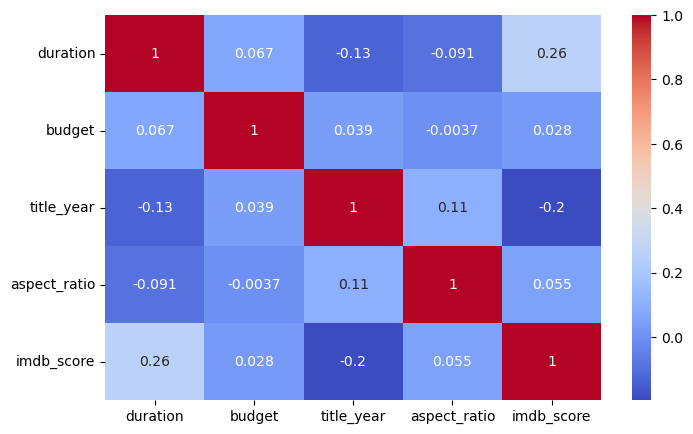

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(
    df_model[numeric_cols + ['imdb_score']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.show()


In [25]:
df_model['genres'].str.split('|').explode().to_frame() \
    .join(df_model['imdb_score']) \
    .groupby('genres')['imdb_score'] \
    .mean() \
    .sort_values(ascending=False)

genres
Film-Noir      7.633333
News           7.533333
Documentary    7.180165
Biography      7.148797
History        7.080882
War            7.070952
Drama          6.765169
Western        6.703191
Sport          6.601130
Animation      6.575000
Crime          6.563061
Musical        6.500763
Mystery        6.483918
Romance        6.446679
Adventure      6.437978
Music          6.406132
Short          6.380000
Thriller       6.308132
Fantasy        6.302744
Sci-Fi         6.279832
Family         6.237640
Action         6.231626
Comedy         6.192857
Horror         5.804630
Reality-TV     4.750000
Game-Show      2.900000
Name: imdb_score, dtype: float64

In [26]:
df_model.groupby('content_rating')['imdb_score'].mean().sort_values(ascending=False)

content_rating
TV-MA        8.244444
TV-Y         7.400000
TV-PG        7.353846
Approved     7.327778
TV-14        7.250000
TV-Y7        7.200000
Passed       7.166667
TV-G         6.920000
GP           6.916667
Unrated      6.889831
M            6.840000
Not Rated    6.621739
NC-17        6.542857
G            6.529464
R            6.508393
X            6.416667
PG           6.288921
PG-13        6.254919
Name: imdb_score, dtype: float64

In [27]:
df_model.groupby('director_name')['imdb_score'].mean().describe()


count    2398.000000
mean        6.239590
std         1.116535
min         1.700000
25%         5.600000
50%         6.400000
75%         7.000000
max         9.500000
Name: imdb_score, dtype: float64

In [28]:
df_model.groupby('director_name')['imdb_score'].mean().describe()

count    2398.000000
mean        6.239590
std         1.116535
min         1.700000
25%         5.600000
50%         6.400000
75%         7.000000
max         9.500000
Name: imdb_score, dtype: float64

In [29]:
df_model['genre_count'] = df_model['genres'].apply(lambda x: len(x.split('|')))

In [30]:
final_features = [
    'duration',
    'title_year',
    'budget',
    'genres',
    'genre_count',
    'director_name',
    'actor_1_name',
    'content_rating'
]

In [31]:
df_final = df_model[final_features + ['imdb_score']].copy()
df_final.head()

,duration,title_year,budget,genres,genre_count,director_name,actor_1_name,content_rating,imdb_score
0,178.0,2009.0,237000000.0,Action|Adventure|Fantasy|Sci-Fi,4,James Cameron,CCH Pounder,PG-13,7.9
1,169.0,2007.0,300000000.0,Action|Adventure|Fantasy,3,Gore Verbinski,Johnny Depp,PG-13,7.1
2,148.0,2015.0,245000000.0,Action|Adventure|Thriller,3,Sam Mendes,Christoph Waltz,PG-13,6.8
3,164.0,2012.0,250000000.0,Action|Thriller,2,Christopher Nolan,Tom Hardy,PG-13,8.5
4,103.0,2005.0,20000000.0,Documentary,1,Doug Walker,Doug Walker,R,7.1


In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4922 entries, 0 to 5042
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   duration        4922 non-null   float64
 1   title_year      4922 non-null   float64
 2   budget          4922 non-null   float64
 3   genres          4922 non-null   object 
 4   genre_count     4922 non-null   int64  
 5   director_name   4922 non-null   object 
 6   actor_1_name    4922 non-null   object 
 7   content_rating  4922 non-null   object 
 8   imdb_score      4922 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 384.5+ KB


In [33]:
df_final.isnull().sum()

duration          0
title_year        0
budget            0
genres            0
genre_count       0
director_name     0
actor_1_name      0
content_rating    0
imdb_score        0
dtype: int64

In [34]:
import re

# Actor names starting with a number
actor_numeric = df_final[
    df_final['actor_1_name'].str.match(r'^\d', na=False)
]

# Director names starting with a number
director_numeric = df_final[
    df_final['director_name'].str.match(r'^\d', na=False)
]

print("Actor names starting with number:", actor_numeric.shape[0])
print("Director names starting with number:", director_numeric.shape[0])

Actor names starting with number: 1
Director names starting with number: 0


In [35]:
actor_numeric['actor_1_name'].unique()

array(['50 Cent'], dtype=object)

In [36]:
df_final['actor_1_name'] = df_final['actor_1_name'].replace('50 Cent', 'Cent')

In [37]:
df_final[df_final['actor_1_name'].str.contains('Cent', na=False)]['actor_1_name'].unique()

array(['Cent'], dtype=object)

In [38]:
text_cols = [
    'genres',
    'director_name',
    'actor_1_name',
    'content_rating'
]

for col in text_cols:
    df_final[col] = df_final[col].str.lower()

In [39]:
df_final[text_cols].head()

,genres,director_name,actor_1_name,content_rating
0,action|adventure|fantasy|sci-fi,james cameron,cch pounder,pg-13
1,action|adventure|fantasy,gore verbinski,johnny depp,pg-13
2,action|adventure|thriller,sam mendes,christoph waltz,pg-13
3,action|thriller,christopher nolan,tom hardy,pg-13
4,documentary,doug walker,doug walker,r


In [40]:
df_final.head()

,duration,title_year,budget,genres,genre_count,director_name,actor_1_name,content_rating,imdb_score
0,178.0,2009.0,237000000.0,action|adventure|fantasy|sci-fi,4,james cameron,cch pounder,pg-13,7.9
1,169.0,2007.0,300000000.0,action|adventure|fantasy,3,gore verbinski,johnny depp,pg-13,7.1
2,148.0,2015.0,245000000.0,action|adventure|thriller,3,sam mendes,christoph waltz,pg-13,6.8
3,164.0,2012.0,250000000.0,action|thriller,2,christopher nolan,tom hardy,pg-13,8.5
4,103.0,2005.0,20000000.0,documentary,1,doug walker,doug walker,r,7.1


In [41]:
genre_imdb = (
    df_final[['genres', 'imdb_score']]
    .assign(genres=df_final['genres'].str.split('|'))
    .explode('genres')
)

In [42]:
genre_avg_score = (
    genre_imdb
    .groupby('genres')['imdb_score']
    .mean()
    .sort_values(ascending=False)
)

genre_avg_score

genres
film-noir      7.633333
news           7.533333
documentary    7.180165
biography      7.148797
history        7.080882
war            7.070952
drama          6.765169
western        6.703191
sport          6.601130
animation      6.575000
crime          6.563061
musical        6.500763
mystery        6.483918
romance        6.446679
adventure      6.437978
music          6.406132
short          6.380000
thriller       6.308132
fantasy        6.302744
sci-fi         6.279832
family         6.237640
action         6.231626
comedy         6.192857
horror         5.804630
reality-tv     4.750000
game-show      2.900000
Name: imdb_score, dtype: float64

In [43]:
genre_count = genre_imdb['genres'].value_counts()

In [44]:
genre_analysis = pd.DataFrame({
    'avg_imdb_score': genre_avg_score,
    'movie_count': genre_count
}).sort_values(by='avg_imdb_score', ascending=False)

genre_analysis

,avg_imdb_score,movie_count
genres,,
film-noir,7.633333,6
news,7.533333,3
documentary,7.180165,121
biography,7.148797,291
history,7.080882,204
war,7.070952,210
drama,6.765169,2538
western,6.703191,94
sport,6.601130,177


In [45]:
genre_score_map = (
    df_final[['genres', 'imdb_score']]
    .assign(genres=df_final['genres'].str.split('|'))
    .explode('genres')
    .groupby('genres')['imdb_score']
    .mean()
    .to_dict()
)

# Create new column
df_final['avg_genre_imdb_score'] = df_final['genres'].apply(
    lambda x: sum(genre_score_map[g] for g in x.split('|')) / len(x.split('|'))
)

In [46]:
df_final.head()


,duration,title_year,budget,genres,genre_count,director_name,actor_1_name,content_rating,imdb_score,avg_genre_imdb_score
0,178.0,2009.0,237000000.0,action|adventure|fantasy|sci-fi,4,james cameron,cch pounder,pg-13,7.9,6.313045
1,169.0,2007.0,300000000.0,action|adventure|fantasy,3,gore verbinski,johnny depp,pg-13,7.1,6.324116
2,148.0,2015.0,245000000.0,action|adventure|thriller,3,sam mendes,christoph waltz,pg-13,6.8,6.325912
3,164.0,2012.0,250000000.0,action|thriller,2,christopher nolan,tom hardy,pg-13,8.5,6.269879
4,103.0,2005.0,20000000.0,documentary,1,doug walker,doug walker,r,7.1,7.180165


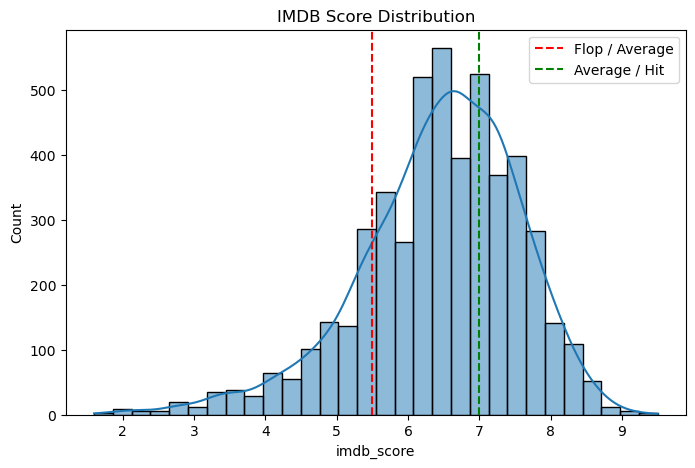

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_final['imdb_score'], bins=30, kde=True)
plt.axvline(5.5, color='red', linestyle='--', label='Flop / Average')
plt.axvline(7.0, color='green', linestyle='--', label='Average / Hit')
plt.title('IMDB Score Distribution')
plt.legend()
plt.show()

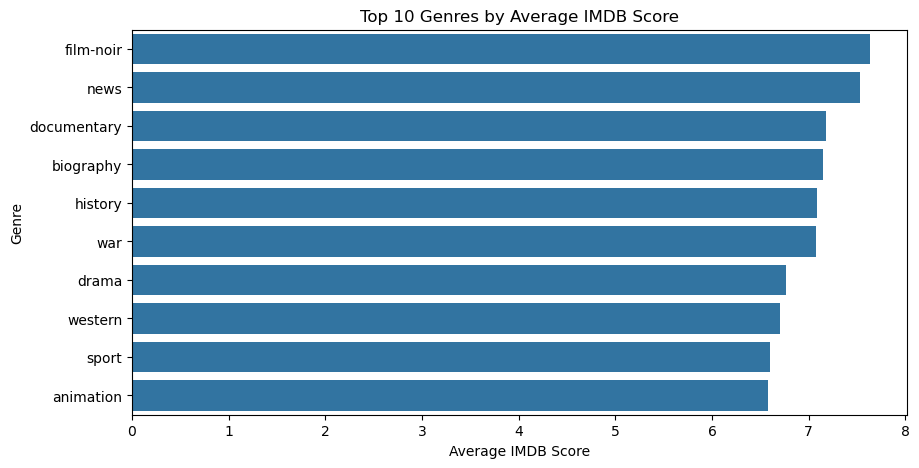

In [48]:
genre_df = (
    df_final[['genres', 'imdb_score']]
    .assign(genres=df_final['genres'].str.split('|'))
    .explode('genres')
)

top_genres = (
    genre_df.groupby('genres')['imdb_score']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres by Average IMDB Score')
plt.xlabel('Average IMDB Score')
plt.ylabel('Genre')
plt.show()

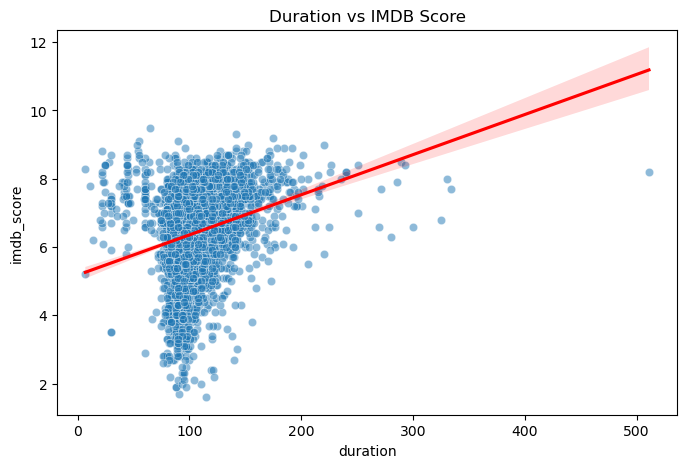

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='duration', y='imdb_score', data=df_final, alpha=0.5)
sns.regplot(x='duration', y='imdb_score', data=df_final, scatter=False, color='red')
plt.title('Duration vs IMDB Score')
plt.show()

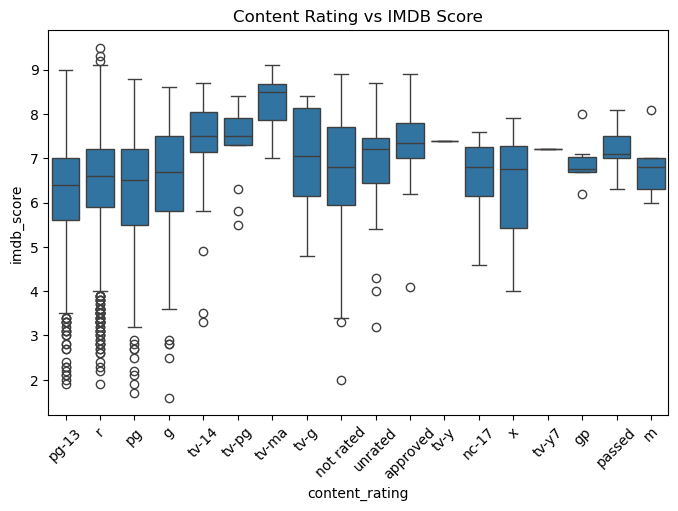

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(x='content_rating', y='imdb_score', data=df_final)
plt.title('Content Rating vs IMDB Score')
plt.xticks(rotation=45)
plt.show()

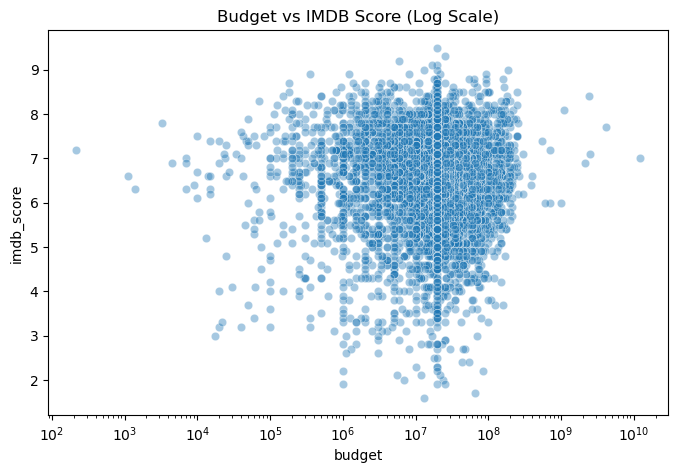

In [51]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='budget', y='imdb_score', data=df_final, alpha=0.4)
plt.xscale('log')
plt.title('Budget vs IMDB Score (Log Scale)')
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='budget', y='imdb_score', data=df_final, alpha=0.4)
plt.xscale('log')
plt.title('Budget vs IMDB Score (Log Scale)')
plt.show()

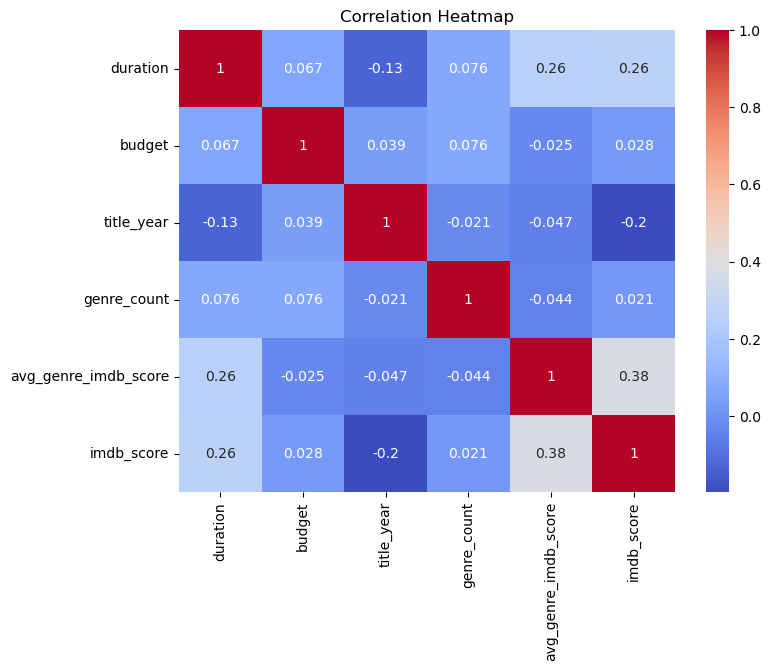

In [ ]:
numeric_cols = [
    'duration',
    'budget',
    'title_year',
    'genre_count',
    'avg_genre_imdb_score',
    'imdb_score'
]

plt.figure(figsize=(8,6))
sns.heatmap(df_final[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = df_final.drop(columns=['imdb_score'])
y = df_final['imdb_score']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_features = [
    'duration',
    'budget',
    'title_year',
    'genre_count',
    'avg_genre_imdb_score'
]

categorical_features = [
    'genres',
    'director_name',
    'actor_1_name',
    'content_rating'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )
}

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    results.append({
        'Model': name,
        'R2 Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    })

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
results_df

,Model,R2 Score,MAE,RMSE
3,Random Forest,0.319384,0.682842,0.940208
1,Ridge Regression,0.312590,0.697720,0.944889
2,Lasso Regression,0.250236,0.732806,0.986814
0,Linear Regression,-0.791647,1.125127,1.525454


In [ ]:

#as we can see random forest is best

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

numeric_features = [
    'duration',
    'budget',
    'title_year',
    'genre_count',
    'avg_genre_imdb_score'
]

categorical_features = [
    'genres',
    'director_name',
    'actor_1_name',
    'content_rating'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

In [ ]:
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['genres', 'director_name',
                                                   'actor_1_name',
                                                   'content_rating']),
                                                 ('num', 'passthrough',
                                                  ['duration', 'budget',
                                                   'title_year', 'genre_count',
                                                   'avg_genre_imdb_score'])])),
                ('model',
                 RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                       random_state=42))])

In [ ]:
import joblib

joblib.dump(final_pipeline, "movie_success_model.pkl")


['movie_success_model.pkl']